In [123]:
# The spark foundation internship
#Task 1
#Predict the percentage of marks of an student based on the the number of study hours
#By-- Ravi Ranjan Sahay

In [124]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [125]:
url= "http://bit.ly/w-data"
data=pd.read_csv(url)

In [126]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [127]:
print(data.shape)

(25, 2)


In [128]:
#For null value check
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [129]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

In [130]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [132]:
#  we can easily analyse that there are two variable one is target variable and other is feature variable.

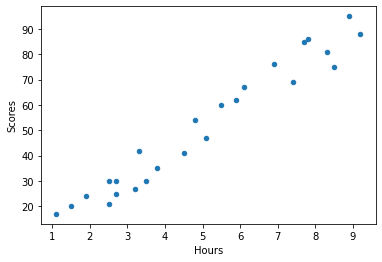

In [133]:
data.plot(kind='scatter',x='Hours',y='Scores')

In [134]:
#Score is directly proportional to hours..

In [135]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [136]:
hours=data["Hours"]
scores=data["Scores"]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


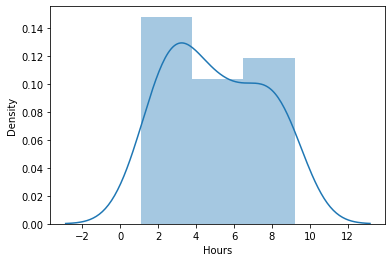

In [137]:
sns.distplot(hours)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


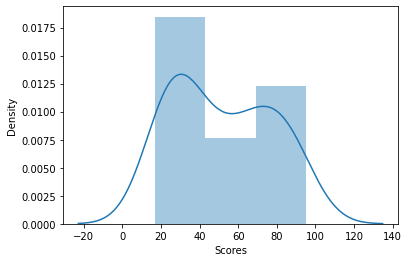

In [138]:
sns.distplot(scores)

In [139]:
#This is simple linear regression problem
#Prepare data 
x=np.array(data["Hours"]).reshape(-1,1)
y=np.array(data['Scores']).reshape(-1,1)

In [140]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=50)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

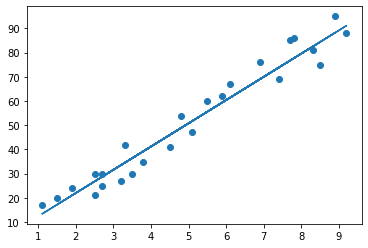

In [141]:
m=reg.coef_
c=reg.intercept_
line=m*x+c
plt.scatter(x,y)
plt.plot(x,line);
plt.show()

In [142]:
#Model Building
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
print(regressor.intercept_)

[2.81023646]


In [144]:
print(regressor.coef_)

[[9.59563563]]


In [145]:
y_pred = regressor.predict(X_test)
y_pred

array([[88.21139357],
       [28.71845267],
       [69.02012231],
       [39.27365186],
       [13.36543566]])

In [146]:
#Actual values
Y_test

array([[95],
       [30],
       [76],
       [35],
       [17]])

In [147]:
df = pd.DataFrame({'Actual': [Y_test], 'Predicted': [y_pred]})
df

,Actual,Predicted
0,"[[95], [30], [76], [35], [17]]","[[88.21139357388518], [28.71845266505782], [69..."


In [153]:
#Predict Data
Hours= 9.5
my_pred = regressor.predict([[Hours]])
print("Hours=",Hours,'\nPrediction =', my_pred)

Hours= 9.5 
Prediction = [[93.96877495]]


In [ ]:
# Study for 9.5 hours your predicted score will be 93.96%...
